In [208]:
import os
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from glob import glob

In [209]:
img_files = glob('00_data/*jpg')
print(img_files)
print(img_files[0])

['00_data/image_15.jpg', '00_data/image_14.jpg', '00_data/image_16.jpg', '00_data/image_17.jpg', '00_data/image_13.jpg', '00_data/image_12.jpg', '00_data/image_10.jpg', '00_data/image_11.jpg', '00_data/image_8.jpg', '00_data/image_9.jpg', '00_data/image_2.jpg', '00_data/image_3.jpg', '00_data/image_1.jpg', '00_data/image_4.jpg', '00_data/image_5.jpg', '00_data/image_7.jpg', '00_data/image_6.jpg', '00_data/image_20.jpg', '00_data/image_19.jpg', '00_data/image_18.jpg']
00_data/image_15.jpg


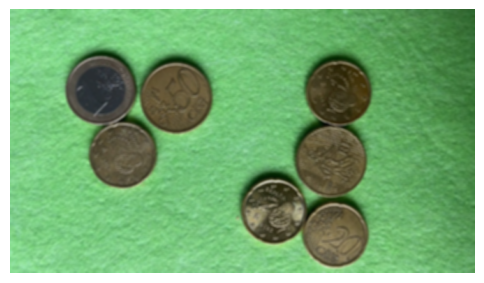

In [210]:
img_num = 10

img_n = os.path.basename(img_files[img_num]).split('.')[0]
img = cv2.imread(f'00_data/{img_n}.jpg')
img = img[:,:img.shape[1]-int(img.shape[1]*0.01), :]
img = cv2.resize(img, None, fx = .7, fy=.7)

imgPre = cv2.GaussianBlur(img, (5, 5), 2)
# imgPre = cv2.medianBlur(img, 21)
# imgPre = cv2.bilateralFilter(img, d=30, sigmaColor=100, sigmaSpace=30)


f, ax = plt.subplots(figsize=(6, 6))
ax.imshow(cv2.cvtColor(imgPre, cv2.COLOR_BGR2RGB))
ax.axis('off')
plt.show()

## Inicio

image_2


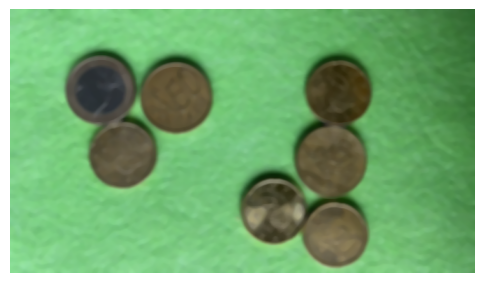

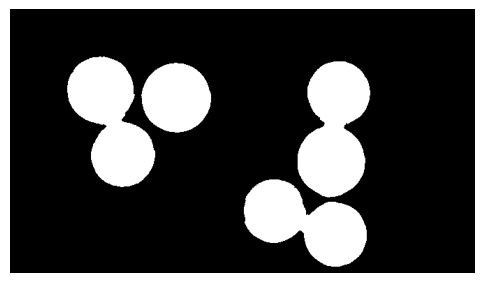

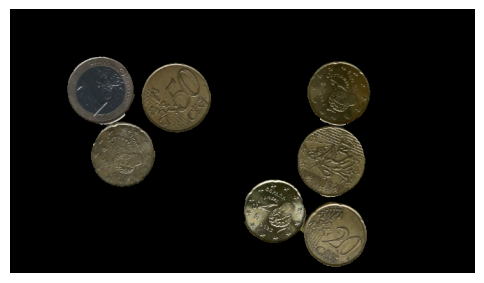

In [211]:
img_num = 10

img_n = os.path.basename(img_files[img_num]).split('.')[0]
img = cv2.imread(f'00_data/{img_n}.jpg')
print(img_n)
img = img[:,:img.shape[1]-int(img.shape[1]*0.01), :]
img = cv2.resize(img, None, fx = .7, fy=.7)

# imgPre = cv2.GaussianBlur(img, (11,11), 11)

imgPre = cv2.GaussianBlur(img, (7,7), 7)
imgPre = cv2.medianBlur(imgPre, 7)

f, ax = plt.subplots(figsize=(6, 6))
ax.imshow(cv2.cvtColor(imgPre, cv2.COLOR_BGR2RGB))
ax.axis('off')
plt.show()

hsv_image = cv2.cvtColor(imgPre, cv2.COLOR_BGR2HSV)

lower_green = np.array([35, 50, 10])  # Límite inferior (H, S, V)
upper_green = np.array([85, 255, 255])  # Límite superior (H, S, V)

# Crear una máscara que solo tenga en cuenta los colores dentro del rango
mask = cv2.inRange(hsv_image, lower_green, upper_green)
inverse_mask = cv2.bitwise_not(mask)


result = cv2.bitwise_and(img, img, mask=inverse_mask)

f, ax = plt.subplots(figsize=(6, 6))
ax.imshow(inverse_mask, cmap='gray')
ax.axis('off')
plt.show()


f, ax = plt.subplots(figsize=(6, 6))
ax.imshow(cv2.cvtColor(result, cv2.COLOR_BGR2RGB))
ax.axis('off')
plt.show()


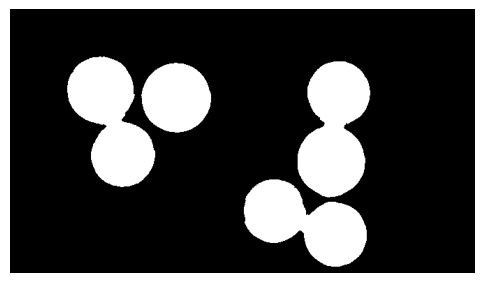

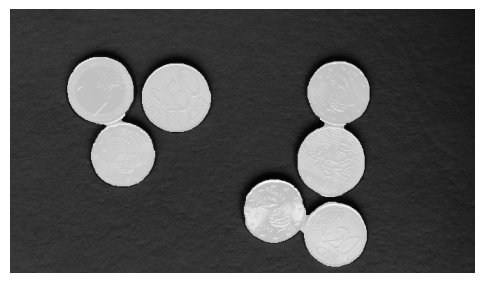

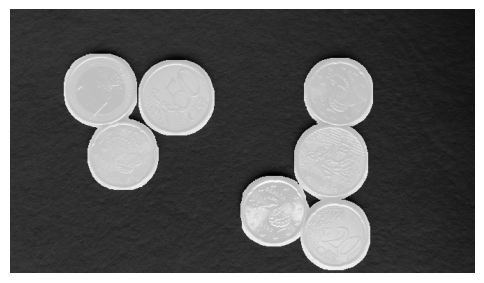

In [212]:
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

kernel = np.ones((3,3),np.uint8)
opening = cv2.morphologyEx(inverse_mask,cv2.MORPH_OPEN,kernel, iterations = 4)

f, ax = plt.subplots(figsize=(6, 6))
ax.imshow(inverse_mask, cmap='gray')
ax.axis('off')
plt.show()


alpha = 0.7
beta = 1 - alpha
gamma = 0  # Valor adicional agregado a cada píxel

imagen_superpuesta = cv2.addWeighted(gray, beta, opening, alpha, gamma)

f, ax = plt.subplots(figsize=(6, 6))
ax.imshow(imagen_superpuesta, cmap='gray')
ax.axis('off')
plt.show()
   
################################################

sure_bg = cv2.dilate(opening,kernel,iterations=5)

alpha = 0.7
beta = 1 - alpha
gamma = 0  # Valor adicional agregado a cada píxel

imagen_superpuesta = cv2.addWeighted(gray, beta, sure_bg, alpha, gamma)

f, ax = plt.subplots(figsize=(6, 6))
ax.imshow(imagen_superpuesta, cmap='gray')
ax.axis('off')
plt.show()


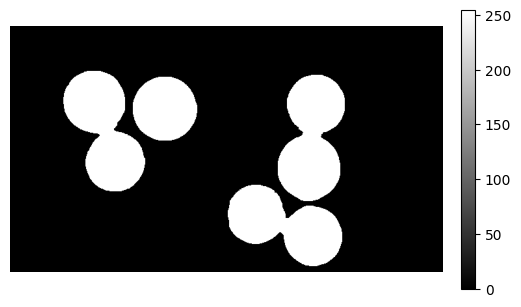

In [213]:
f, ax = plt.subplots(figsize=(6, 6))
im = ax.imshow(opening, cmap='gray')
ax.axis('off')
cbar = f.colorbar(im, fraction=.03, pad=0.04)    # Añade la barra de colores
plt.show()

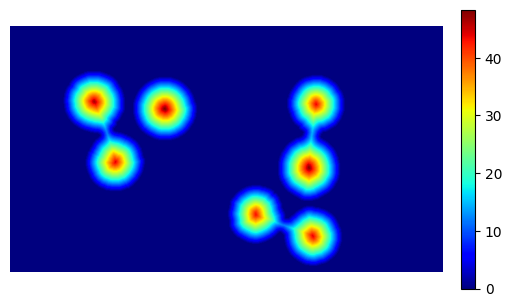

In [214]:
dist_transform = cv2.distanceTransform(opening,cv2.DIST_L2,5)
ret, sure_fg = cv2.threshold(dist_transform,0.4*dist_transform.max(),255,0)

f, ax = plt.subplots(figsize=(6, 6))
im = ax.imshow(dist_transform, cmap='jet')
ax.axis('off')
cbar = f.colorbar(im, fraction=.03, pad=0.04)    # Añade la barra de colores
plt.show()

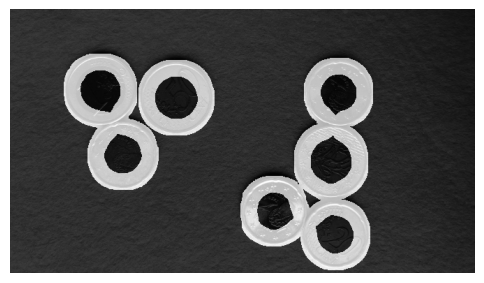

In [215]:
sure_fg = np.uint8(sure_fg)
unknown = cv2.subtract(sure_bg,sure_fg)


alpha = 0.7
beta = 1 - alpha
gamma = 0  # Valor adicional agregado a cada píxel

imagen_superpuesta = cv2.addWeighted(gray, beta, unknown, alpha, gamma)

f, ax = plt.subplots(figsize=(6, 6))
ax.imshow(imagen_superpuesta, cmap='gray')
ax.axis('off')
plt.show()

[0 1 2 3 4 5 6 7]


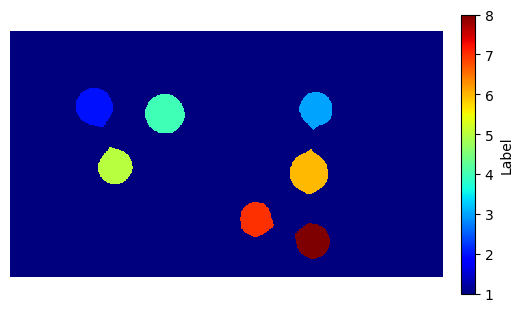

In [216]:
_, labels = cv2.connectedComponents(sure_fg)
print(np.unique(labels))

labels = labels+1


f, ax = plt.subplots(figsize=(6, 6))
im = ax.imshow(labels, cmap='jet', interpolation='nearest')
f.colorbar(im, ax=ax, label='Label', ticks=np.arange(labels.max() + 1), fraction=.03, pad=0.04)  
ax.axis('off')
plt.show()

## Resultado

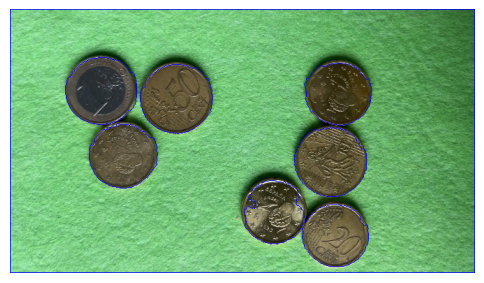

In [217]:
labels[unknown==255] = 0

markers = cv2.watershed(img,labels)

img[markers == -1] = [255,0,0] # Bordes en azul

f, ax = plt.subplots(figsize=(6, 6))
ax.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
ax.axis('off')
plt.show()




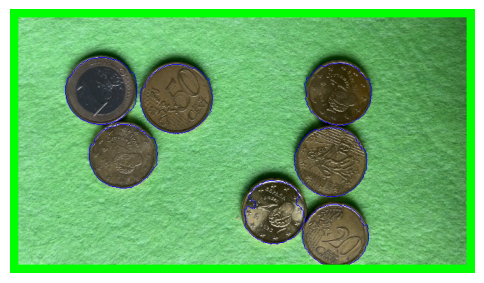

In [218]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Suponiendo que ya tienes los `markers` del Watershed
# Creamos una máscara para detectar los contornos
contour_mask = np.zeros_like(markers, dtype=np.uint8)
contour_mask[markers > 0] = 255  # Considera todas las regiones con etiquetas positivas

# Detectamos contornos
contours, _ = cv2.findContours(contour_mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)


# Dibujamos los contornos sobre la imagen original
img_contours = img.copy()
cv2.drawContours(img_contours, contours, -1, (0, 255, 0), 20)  # Verde para los contornos

# Visualizamos el resultado
f, ax = plt.subplots(figsize=(6, 6))
ax.imshow(cv2.cvtColor(img_contours, cv2.COLOR_BGR2RGB))
ax.axis('off')
plt.show()
